# EECS 4412 Phase 2
#### Param Balaganeshan<br>215686694<br>param11@my.yorku.ca

## Objective

#### The purpose of this activity is to apply some fundamental data mining techniques on the data.

## Task 0: Your Data

#### Submit your data in the form of 1 or more csv files. Use appropriate labels/description to describe the purpose of each file. The filename must have your user id(s) in the prefix: “100131001-100131002—T0”

## Task 1: Purpose or Scope of the Data Mining Process

#### Describe at least one approach to combine the data from the 10 companies as one unit/set.

First we need to add an attribute "Stock Name" to all tables to label all the rows to the corresponding company. Since all the data shares the same attributes we can simply just combine all the tables into one big table. Best way to do this is using Python to access all the files by looping through them and then merging them into one big CSV. Also we only need the csv header data from the first CSV, the rest of the header data from other CSVs can be dropped as they will add unnecessary rows.

In [3]:
import pandas as pd
import os

In [4]:
# Added label "Stock Name" to all CSV files which holds com
directory = 'Data/'
combined_tables = pd.DataFrame()

# Now iterate through directory
for file in os.listdir(directory):
    data = pd.read_csv(f'{directory}{file}')
    combined_tables = pd.concat([combined_tables, data], axis = 0)
combined_tables.to_csv(f'{directory}merged_data.csv')

Here the merged data can be shown

In [5]:
all_data = pd.read_csv(f'{directory}merged_data.csv')
# Drop unneeded index column
all_data = all_data.drop('Unnamed: 0', axis = 1)
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2022-06-29,137.460007,140.669998,136.669998,139.229996,138.403564,66242400,AAPL
1,2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908478,98964500,AAPL
2,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.105347,71051600,AAPL
3,2022-07-05,137.770004,141.610001,136.929993,141.559998,140.719727,73353800,AAPL
4,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,AAPL
...,...,...,...,...,...,...,...,...
2514,2023-06-22,250.770004,265.000000,248.250000,264.609985,264.609985,166875900,TSLA
2515,2023-06-23,259.290009,262.450012,252.800003,256.600006,256.600006,176584100,TSLA
2516,2023-06-26,250.070007,258.369995,240.699997,241.050003,241.050003,179990600,TSLA
2517,2023-06-27,243.240005,250.389999,240.850006,250.210007,250.210007,164968200,TSLA


#### Describe at least 3 possible questions/findings that you can explore/discover from this data.  Explain with the help of suitable example(s) what your anticipated targets are. Make sure that at least one of them is the classification task as you are going to use it in later tasks.

1. One possible question that can be asked is when is the best time to buy or sell overall for all stocks. For example, since we have dates and price data, we can maybe see patterns when the stock prices raises or bottoms therefore have a target that states a time period when most stocks crash and when most stocks climb. But stock prices are heavily influenced by external factors not seen in the data therefore can be difficult to see the whole picture.
<br>
<br>
2. An obvious question would be to ask what stock from the 10 companies was the best to invest in overall. The anticipated target would simply be to return just 1 company that performed the best over the year and predicts what stock is most stable and guesses that it will increase in the future.
<br>
<br>
3. The classification task could be to classify what the stock company is based on the combined data of all 10 companies. For example, if the stock name label was removed, the target is to classify what company each row represents.

## Task 2:  Visualizing the Data

#### Select any two dimensions from your data: 
1. Volume
<br>
2. Adj Close

#### Describe these dimensions with the help of a suitable visualization technique.

1. Volume
<br>
Here we can use a pie chart that will show the percentages of the total volumes traded in the 2022-2023 time period.

C:\Users\param\AppData\Local\Temp\ipykernel_4748\2052723968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Stock Name']).sum().plot(kind='pie', y='Volume', autopct='%1.0f%%')


<Axes: ylabel='Volume'>

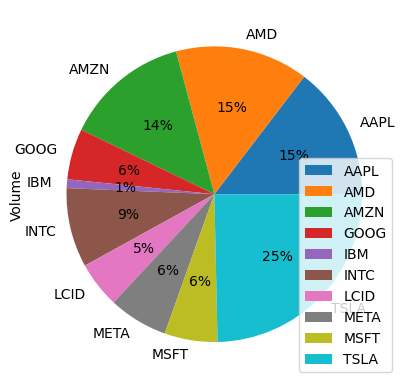

In [8]:
all_data.groupby(['Stock Name']).sum().plot(kind='pie', y='Volume', autopct='%1.0f%%')

2. Adj Close
<br>
Here we can use a bar graph that displays the mean of the Adj Close per company.

C:\Users\param\AppData\Local\Temp\ipykernel_4748\1264631177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Stock Name').mean().plot(kind='bar', y='Adj Close')


<Axes: xlabel='Stock Name'>

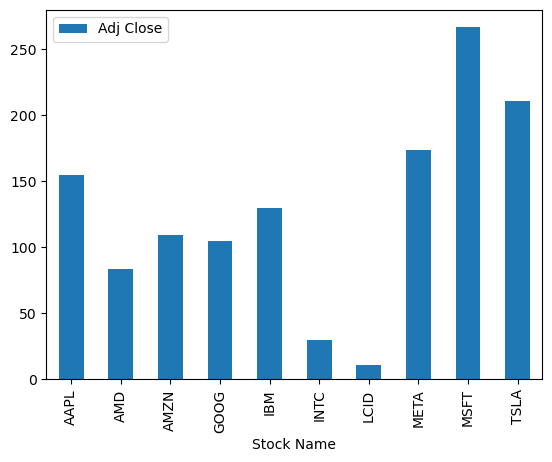

In [13]:
all_data.groupby('Stock Name').mean().plot(kind='bar', y='Adj Close')

#### For each visualization above, describe what insight you (may) get, or you expected to get?

1. Volume
<br>
Used a pie graph to see total volume traded throughout the year and this can tell us how active the stock is. The more active the stock, the more liquid it is. As observed in the pie graph, TSLA has huge amounts of volumes traded at 25% versus IBM at 1%.
<br>
<br>
2. Adj Close
<br>
Used a bar graph to get the mean value of adjusted closing price for each company for the 2022-2023 year. This can give us an idea the price for each stock trades at. As observed in the bar graph, MSFT trades at a really usually high price over 250 whereas LCID trades for under 20.

## Task 3: Data Preprocessing

#### Select any two dimensions from your data:
1. Volume
<br>
2. Adj Close

#### Apply a preprocessing technique on this dimension and then compare the before and after data using a suitable visualization technique, in a single visualization. You must apply a different preprocessing technique to each dimension you have selected.

1. Volume
<br>
Applying stratified sampling by splitting the data based on the company, then taking samples from each partition. Below, we will take 38 samples from total of 250+ from each company. Then visualize processed data using pie chart.

Before preprocessing Volume

C:\Users\param\AppData\Local\Temp\ipykernel_4748\2052723968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Stock Name']).sum().plot(kind='pie', y='Volume', autopct='%1.0f%%')


<Axes: ylabel='Volume'>

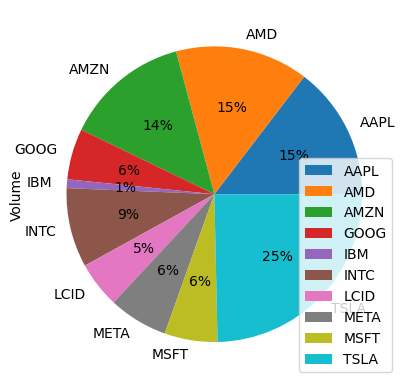

In [14]:
all_data.groupby(['Stock Name']).sum().plot(kind='pie', y='Volume', autopct='%1.0f%%')

After preprocessing Volume

In [24]:
preprocess_volume = all_data.groupby('Stock Name', group_keys=False).apply(lambda x: x.sample(38))

In [26]:
# Here is the sampled data
preprocess_volume

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
201,2023-04-18,166.100006,167.410004,165.649994,166.470001,166.240067,49923000,AAPL
1,2022-06-30,137.250000,138.369995,133.770004,136.720001,135.908478,98964500,AAPL
142,2023-01-23,138.119995,143.320007,137.899994,141.110001,140.700256,81760300,AAPL
116,2022-12-13,149.500000,149.970001,144.240005,145.470001,145.047607,93886200,AAPL
150,2023-02-02,148.899994,151.179993,148.169998,150.820007,150.382065,118339000,AAPL
...,...,...,...,...,...,...,...,...
2404,2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900,TSLA
2397,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,TSLA
2472,2023-04-21,164.800003,166.000000,161.320007,165.080002,165.080002,123539000,TSLA
2360,2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400,TSLA


C:\Users\param\AppData\Local\Temp\ipykernel_4748\1304125961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  preprocess_volume.groupby(['Stock Name']).sum().plot(kind='pie', y='Volume', autopct='%1.0f%%')


<Axes: ylabel='Volume'>

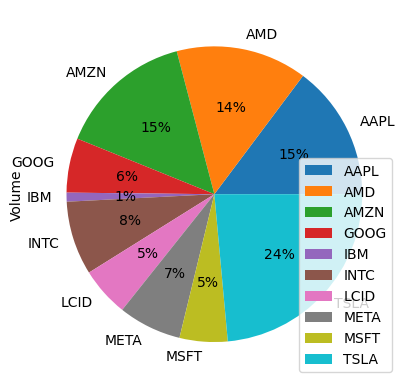

In [27]:
preprocess_volume.groupby(['Stock Name']).sum().plot(kind='pie', y='Volume', autopct='%1.0f%%')

2. Adj Close
<br>
Here the normalization technique will be applied to the Adj Close dimension using a MinMaxScaler from sklearn.

Before preprocessing Adj Close

C:\Users\param\AppData\Local\Temp\ipykernel_4748\1264631177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Stock Name').mean().plot(kind='bar', y='Adj Close')


<Axes: xlabel='Stock Name'>

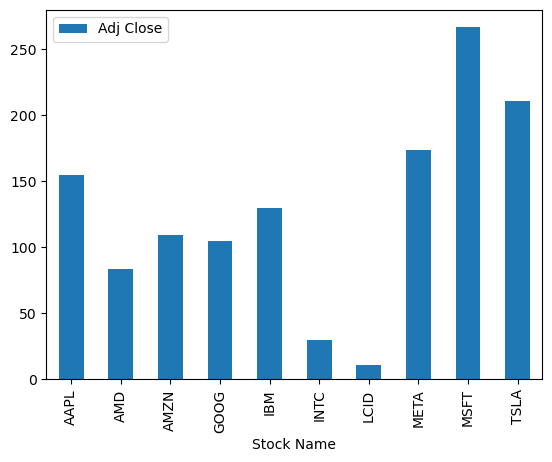

In [23]:
all_data.groupby('Stock Name').mean().plot(kind='bar', y='Adj Close')

After preprocessing Adj Close

In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

preprocess_adj_close = all_data.copy()
preprocess_adj_close['Adj Close'] = MinMaxScaler().fit_transform(np.array(preprocess_adj_close['Adj Close']).reshape(-1,1))

In [30]:
# Display Adj Close normalized values
preprocess_adj_close

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2022-06-29,137.460007,140.669998,136.669998,139.229996,0.387980,66242400,AAPL
1,2022-06-30,137.250000,138.369995,133.770004,136.720001,0.380698,98964500,AAPL
2,2022-07-01,136.039993,139.039993,135.660004,138.929993,0.387110,71051600,AAPL
3,2022-07-05,137.770004,141.610001,136.929993,141.559998,0.394740,73353800,AAPL
4,2022-07-06,141.350006,144.119995,141.080002,142.919998,0.398686,74064300,AAPL
...,...,...,...,...,...,...,...,...
2514,2023-06-22,250.770004,265.000000,248.250000,264.609985,0.756326,166875900,TSLA
2515,2023-06-23,259.290009,262.450012,252.800003,256.600006,0.732948,176584100,TSLA
2516,2023-06-26,250.070007,258.369995,240.699997,241.050003,0.687564,179990600,TSLA
2517,2023-06-27,243.240005,250.389999,240.850006,250.210007,0.714298,164968200,TSLA


C:\Users\param\AppData\Local\Temp\ipykernel_4748\3210599384.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  preprocess_adj_close.groupby('Stock Name').mean().plot(kind='bar', y='Adj Close')


<Axes: xlabel='Stock Name'>

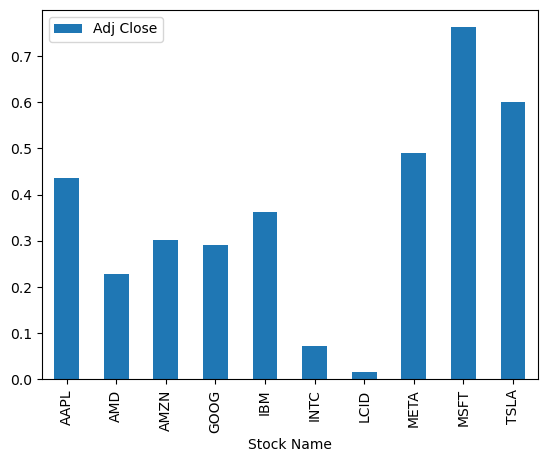

In [31]:
preprocess_adj_close.groupby('Stock Name').mean().plot(kind='bar', y='Adj Close')

#### For each of the preprocessing performed above, describe what insight you (may) get, or you expected to get?

1. Volume
<br>
After performing the stratified sampling, the pie chart before and after sampling was similar where some values differed only by +/- 1%. For example, TSLA went from 25% to 24% after data sampling. Although the total data size is not large, only 2000+ objects, with larger data samples with millions of objects, stratified sampling is a efficient way to obtain a summary of the total data with minor losses. 
<br>
<br>
2. Adj Close
<br>
After performing normalization on Adj Close, we can see the bar graph does not change its shape, only the scale differs. This means the data is already somewhat normalized. 

## Task 4: Principal Component Analysis

#### Using a suitable tool/language, perform the Principal Component Analysis and select two best PCs.

First need to perform binarization on nominal values Date and Stock Name.

In [85]:
# Preprocessing for Stock Name
all_data_pca = all_data.copy()
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('AAPL', 0)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('AMD', 1)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('AMZN', 2)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('GOOG', 3)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('IBM', 4)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('INTC', 5)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('LCID', 6)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('META', 7)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('MSFT', 8)
all_data_pca['Stock Name'] = all_data_pca['Stock Name'].replace('TSLA', 9)

# Preprocessing for Date
for index, row in all_data_pca.iterrows():
    new_str = row['Date'].replace('-', '')
    all_data_pca['Date'] = all_data_pca['Date'].replace(row['Date'], int(new_str))

Here is the newly processed data.

In [87]:
all_data_pca

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,20220629,137.460007,140.669998,136.669998,139.229996,138.403564,66242400,0
1,20220630,137.250000,138.369995,133.770004,136.720001,135.908478,98964500,0
2,20220701,136.039993,139.039993,135.660004,138.929993,138.105347,71051600,0
3,20220705,137.770004,141.610001,136.929993,141.559998,140.719727,73353800,0
4,20220706,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,0
...,...,...,...,...,...,...,...,...
2514,20230622,250.770004,265.000000,248.250000,264.609985,264.609985,166875900,9
2515,20230623,259.290009,262.450012,252.800003,256.600006,256.600006,176584100,9
2516,20230626,250.070007,258.369995,240.699997,241.050003,241.050003,179990600,9
2517,20230627,243.240005,250.389999,240.850006,250.210007,250.210007,164968200,9


In [88]:
from sklearn.decomposition import PCA
all_data_pca = MinMaxScaler().fit_transform(all_data_pca)
# Take the 2 best components
pca_analysis = PCA(n_components=2)
pca_analysis.fit(all_data_pca)
reduced = pca_analysis.transform(all_data_pca)

Here the 2 best PCs are displayed as 2 arrays.

In [89]:
pca_analysis.components_

array([[ 0.13773962,  0.41556149,  0.42168268,  0.42136415,  0.42005393,
         0.41934858,  0.02617945,  0.3162096 ],
       [-0.99006902,  0.05586496,  0.05689499,  0.05492047,  0.055178  ,
         0.05321272, -0.01265483,  0.06597565]])

#### Use a suitable graph/chart/visualization technique to describe the two PCs

In [96]:
import plotly.express as px

fig = px.scatter_matrix(reduced)
fig.show()

C:\Users\param\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



#### Describe any data preprocessing that you require for this task.

For this task, it was nessesary to preprocess "Stock Name" and "Date" as they were strings. Therefore binarization was performed on both dimensions in order to convert the string nominal value to an integer.

## Task 5: Similarity Measurement
#### This task is based on the classification target that you suggested in Task-1.
The classification task is to classify what the stock company is based on the combined data of all 10 companies. For example, if the stock name label was removed, the target is to classify what company each row represents.

#### What are different dimensions and instances in the context of your classification task?

Here we are going to use the merged data between all companies, therefore we are going to use all 2519 instances. We are going to use all dimensions excluding "Stock Name" as the features for the model and our target/label will be the dimension "Stock Name". Therefore the test set will remove the values for the "Stock Name" dimension and the classifier will predict what the stock name is.

#### What is the concept/meaning of similarity for this problem?

The concept of similarity of this problem is to see how similar the same company stock is to one another during the 1 year period. We should see that all the dimensions should be similar to one another for the same company.

## Task 6:  Classification
#### This task is based on the classification target that you suggested in Task-1.
The classification task is to classify what the stock company is based on the combined data of all 10 companies. For example, if the stock name label was removed, the target is to classify what company each row represents.

First preprocessing is neeeded, by binarizing "Date".

In [114]:
# Preprocessing for Stock Name
all_data_class = all_data.copy()
# Preprocessing for Date
for index, row in all_data_class.iterrows():
    new_str = row['Date'].replace('-', '')
    all_data_class['Date'] = all_data_class['Date'].replace(row['Date'], int(new_str))
all_data_class

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,20220629,137.460007,140.669998,136.669998,139.229996,138.403564,66242400,AAPL
1,20220630,137.250000,138.369995,133.770004,136.720001,135.908478,98964500,AAPL
2,20220701,136.039993,139.039993,135.660004,138.929993,138.105347,71051600,AAPL
3,20220705,137.770004,141.610001,136.929993,141.559998,140.719727,73353800,AAPL
4,20220706,141.350006,144.119995,141.080002,142.919998,142.071655,74064300,AAPL
...,...,...,...,...,...,...,...,...
2514,20230622,250.770004,265.000000,248.250000,264.609985,264.609985,166875900,TSLA
2515,20230623,259.290009,262.450012,252.800003,256.600006,256.600006,176584100,TSLA
2516,20230626,250.070007,258.369995,240.699997,241.050003,241.050003,179990600,TSLA
2517,20230627,243.240005,250.389999,240.850006,250.210007,250.210007,164968200,TSLA


#### Divide your data into two groups, training, and test. Briefly describe your process.

Based of research, the best split ratio is 80:20. This is because the more training data, the more accurate the model will become compared to other splits such as 50:50 or 70:30. 20% of the split being test, around 500 objects is a decent sized group. The other ~2000 objects will be used to train the classifier. Furthermore, the training and test set will be stratified, 80% of objects will be taken from each company, therefore a balanced train set and the rest will be used for testing (20% from each company).
<br>
<br>
X_train: The set that uses the features to train the model.
<br>
X_test: The set that uses the features to test the model.
<br>
y_train: The set that uses the label/target to train the model.
<br>
y_test: The set that uses the label/target to test the model.
<br>
<br>
Recall: The target is to classify "Stock Name".

In [115]:
from sklearn.model_selection import train_test_split

# Get all dimensions except "Stock Name"
features = all_data_class.drop('Stock Name', axis=1)
# Label/Target is "Stock Name"
label = all_data_class['Stock Name']
# Here we split the data 
X_train, X_test, y_train, y_test = train_test_split(features, label, stratify=label, test_size=0.2)

In [116]:
X_train

,Date,Open,High,Low,Close,Adj Close,Volume
1098,20221104,135.649994,137.729996,134.940002,136.960007,131.905380,4178000
1980,20230509,231.460007,235.880005,231.080002,233.369995,233.369995,16865600
1856,20221108,95.919998,97.800003,94.790001,96.470001,96.470001,52088300
2168,20230206,257.440002,258.299988,254.779999,256.769989,255.569763,22518000
298,20220902,83.320000,83.650002,79.809998,80.239998,80.239998,84924400
...,...,...,...,...,...,...,...
2460,20230404,197.320007,198.740005,190.320007,192.580002,192.580002,126463800
2374,20221129,184.990005,186.380005,178.750000,180.830002,180.830002,83357100
402,20230202,84.290001,88.940002,83.199997,88.309998,88.309998,97762100
863,20221130,95.120003,101.449997,94.669998,101.449997,101.449997,39888100


In [117]:
X_test

,Date,Open,High,Low,Close,Adj Close,Volume
2455,20230328,192.000000,192.350006,185.429993,189.190002,189.190002,98654600
2224,20230427,295.970001,305.200012,295.250000,304.829987,304.165070,46462600
1829,20220930,136.050003,140.990005,135.500000,135.679993,135.679993,33166400
308,20220919,75.389999,77.339996,75.349998,76.769997,76.769997,64966900
568,20220929,115.599998,116.070000,113.059998,114.800003,114.800003,58969700
...,...,...,...,...,...,...,...
682,20230315,93.220001,96.669998,93.070000,96.199997,96.199997,70731800
1675,20230222,10.040000,10.220000,9.822000,9.980000,9.980000,26981500
1485,20230522,29.850000,30.450001,29.820000,30.280001,30.280001,28693400
949,20230405,106.120003,106.540001,104.101997,104.949997,104.949997,21864200


In [118]:
y_train

1098     IBM
1980    META
1856    META
2168    MSFT
298      AMD
        ... 
2460    TSLA
2374    TSLA
402      AMD
863     GOOG
493      AMD
Name: Stock Name, Length: 2015, dtype: object

In [119]:
y_test

2455    TSLA
2224    MSFT
1829    META
308      AMD
568     AMZN
        ... 
682     AMZN
1675    LCID
1485    INTC
949     GOOG
1926    META
Name: Stock Name, Length: 504, dtype: object

#### Do you require any pre-processing? Describe briefly. 

Binarization was applied on "Date" to convert the string into an integer.

#### Create a decision tree classifier using some suitable tool/language. Submit the code for this classifier in a suitable manner. The filename must have your user id(s) in the prefix: “100131001-100131002—T6”. This/these file(s) must be uploaded to the space/link on the eClass. In Crowdmark, for this part, add the screenshots of your step(s).

In [122]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

#### Use this classifier on your test data observations and describe its performance and accuracy.

Now that the classifer has been trained and has madepredictions, the accuracy of the model can now be tested and evaluated.

In [123]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9285714285714286

As you can see above, the accuracy of the classifier is about 93%. This is considered very accurate. This is most likely due to the fact that we stratified the data based on Stock Name. This allowed the model to get even amounts of data for each company. 